# Percentiles script
Script to generate rainfall percentiles for ACS GWLs

Chore list:
- decouple plot / write functions
- add BC source into percentile plot title
- stippling for multi-model mean > inter-model sd

In [1]:
import os
os.chdir('/g/data/mn51/users/jb6465/acs-drought/percentiles_spi_spei_smi')
import dictionaries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from core_functions import mask_ocean, calculate_spi, load_target_variable
from plot_write_functions import plot_write_percentile_threshold, plot_comparison_box_whisker, plot_comparison_heatmap

### DASK setup

In [2]:
import dask
import tempfile
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

dask.config.set({
    'array.chunk-size': "256 MiB",
    'array.slicing.split_large_chunks': True, #This can make AXIOM very slow
    'distributed.comm.timeouts.connect': '120s',
    'distributed.comm.timeouts.tcp': '120s',
    'distributed.comm.retry.count': 10,
    'distributed.scheduler.allowed-failures': 20,
    "distributed.scheduler.worker-saturation": 1.1, #This should use the new behaviour which helps with memory pile up
})

# client = dask.distributed.Client()
client = Client(n_workers=10, threads_per_worker=1, local_directory = tempfile.mkdtemp(), memory_limit = "63000mb")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 10
Total threads: 10,Total memory: 586.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44039,Workers: 10
Dashboard: /proxy/8787/status,Total threads: 10
Started: Just now,Total memory: 586.73 GiB
Comm: tcp://127.0.0.1:41577,Total threads: 1
Dashboard: /proxy/38175/status,Memory: 58.67 GiB
Nanny: tcp://127.0.0.1:43687,


In [6]:
# client.close()

### Load rainfall

In [4]:
BC_SWITCH = True
BC_METHOD = 'QME'
BC_SOURCE = 'AGCD' #AGCD BARRA-R2

In [5]:
rain = load_target_variable('var_p', 3, ['recent', 'GWL1.2-ssp370', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370'],\
                            bc=BC_SWITCH, bc_method=BC_METHOD, bc_source=BC_SOURCE)

---> BC SWITCH ON: USING DATA FROM ia39

---> LOADING RECENT PERIOD
- AGCD
- BARPA-R-CMCC-ESM2 (r1i1p1f1)
- BARPA-R-ACCESS-ESM1-5 (r6i1p1f1)
- BARPA-R-ACCESS-CM2 (r4i1p1f1)
- BARPA-R-EC-Earth3 (r1i1p1f1)
- BARPA-R-CESM2 (r11i1p1f1)
- BARPA-R-MPI-ESM1-2-HR (r1i1p1f1)
- BARPA-R-NorESM2-MM (r1i1p1f1)
- CCAM-v2203-SN-CMCC-ESM2 (r1i1p1f1)
- CCAM-v2203-SN-ACCESS-ESM1-5 (r6i1p1f1)
- CCAM-v2203-SN-ACCESS-CM2 (r4i1p1f1)
- CCAM-v2203-SN-EC-Earth3 (r1i1p1f1)
- CCAM-v2203-SN-CESM2 (r11i1p1f1)
- CCAM-v2203-SN-CNRM-ESM2-1 (r1i1p1f2)

---> LOADING GWL1.2-SSP370 PERIOD
- BARPA-R-CMCC-ESM2 (r1i1p1f1)
- BARPA-R-ACCESS-ESM1-5 (r6i1p1f1)
- BARPA-R-ACCESS-CM2 (r4i1p1f1)
- BARPA-R-EC-Earth3 (r1i1p1f1)
- BARPA-R-CESM2 (r11i1p1f1)
- BARPA-R-MPI-ESM1-2-HR (r1i1p1f1)
- BARPA-R-NorESM2-MM (r1i1p1f1)
- CCAM-v2203-SN-CMCC-ESM2 (r1i1p1f1)
- CCAM-v2203-SN-ACCESS-ESM1-5 (r6i1p1f1)
- CCAM-v2203-SN-ACCESS-CM2 (r4i1p1f1)
- CCAM-v2203-SN-EC-Earth3 (r1i1p1f1)
- CCAM-v2203-SN-CESM2 (r11i1p1f1)
- CCAM-v2203-SN-CNRM-ESM2-1 (

### Percentile threshold analysis

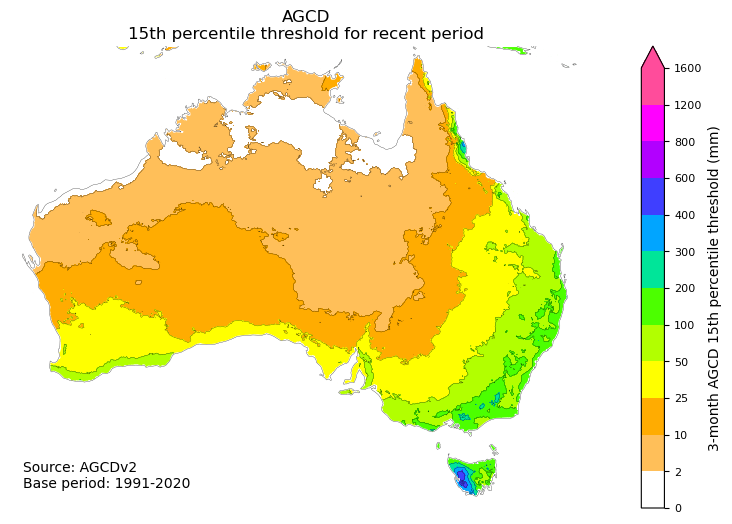

<Figure size 640x480 with 0 Axes>

In [5]:
plot_write_percentile_threshold('AGCD', 'recent', rain['recent']['AGCD'], 15, 3, bias_correction=False, write_netcdf=False)

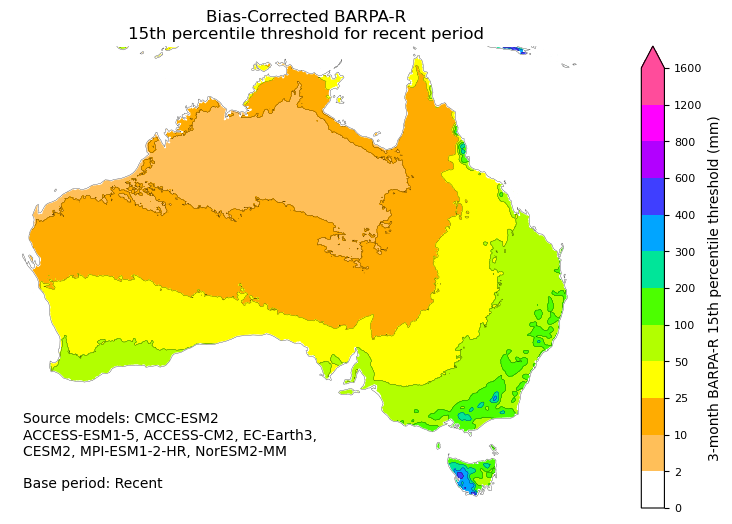

<Figure size 640x480 with 0 Axes>

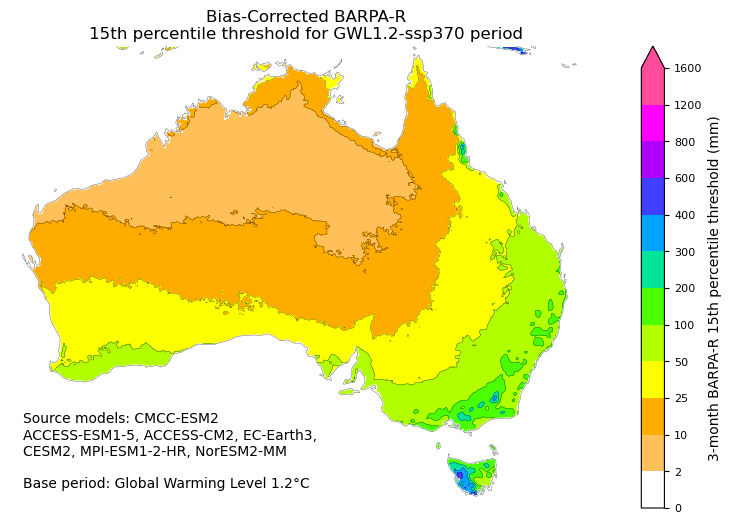

<Figure size 640x480 with 0 Axes>

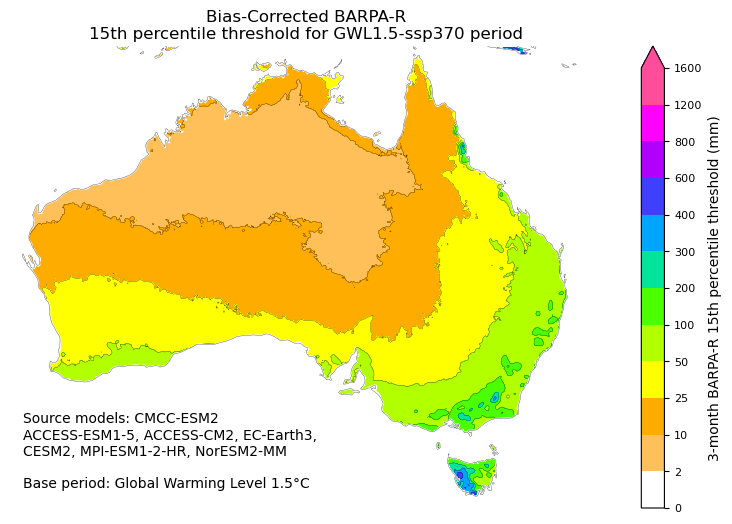

<Figure size 640x480 with 0 Axes>

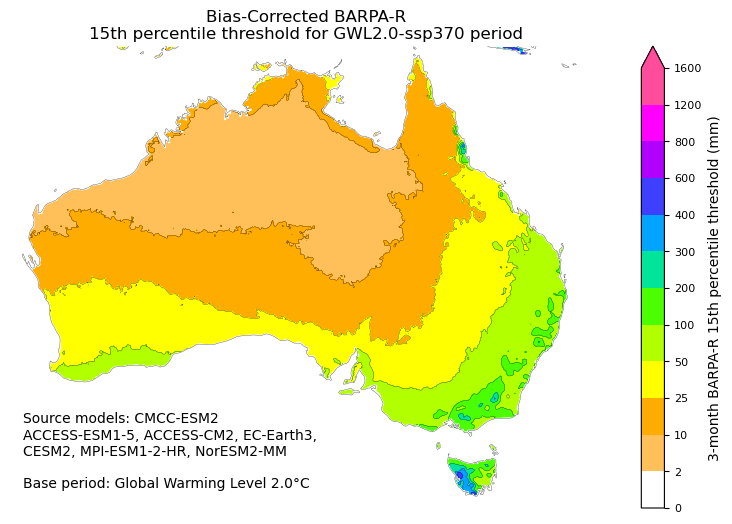

<Figure size 640x480 with 0 Axes>

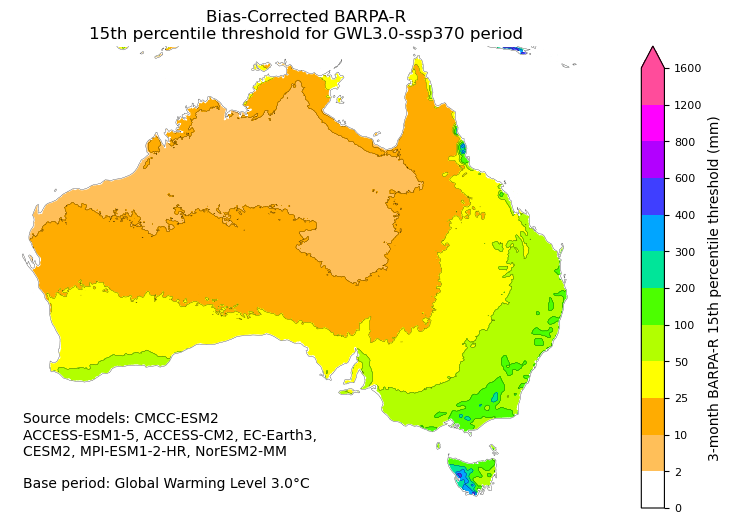

<Figure size 640x480 with 0 Axes>

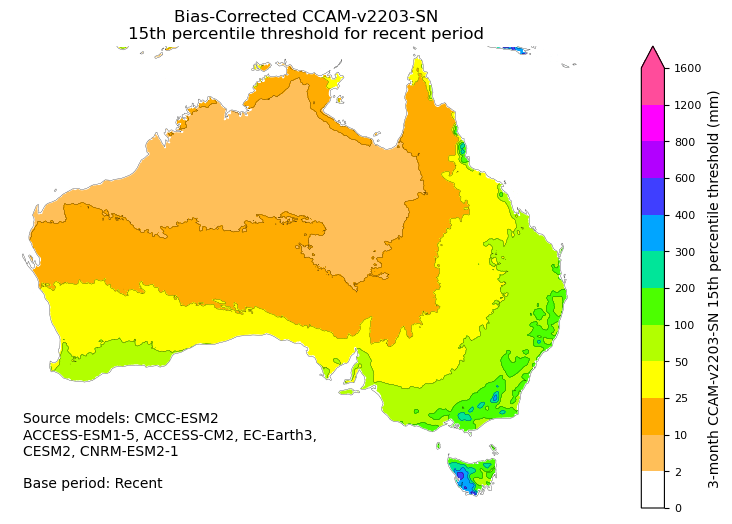

<Figure size 640x480 with 0 Axes>

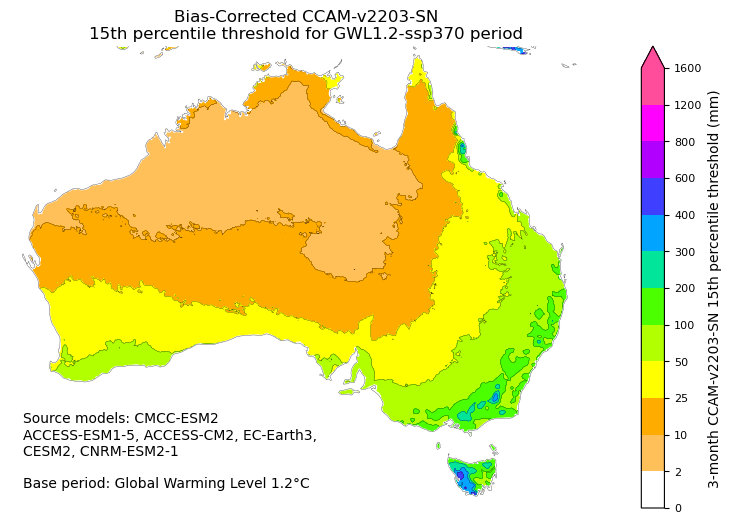

<Figure size 640x480 with 0 Axes>

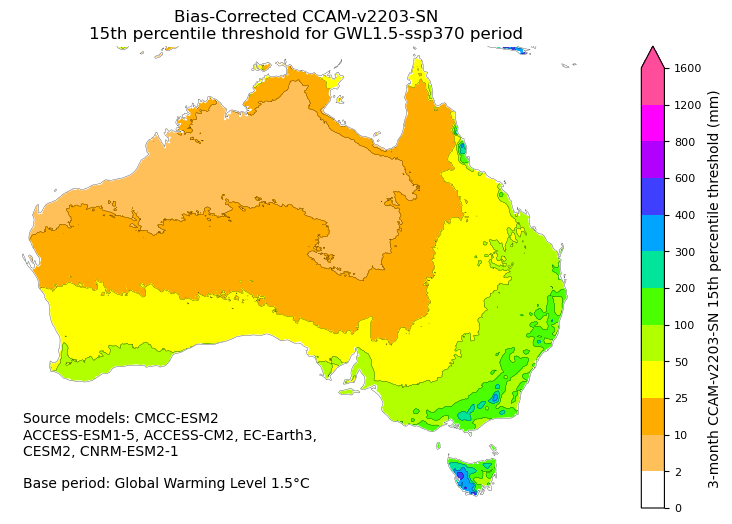

<Figure size 640x480 with 0 Axes>

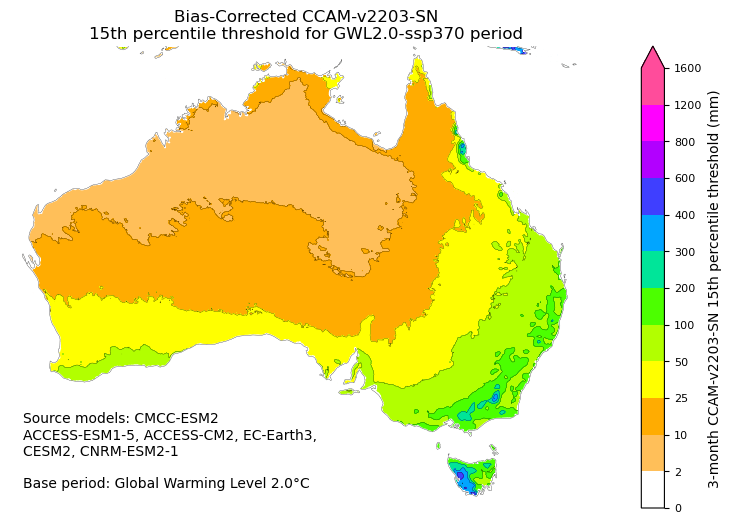

<Figure size 640x480 with 0 Axes>

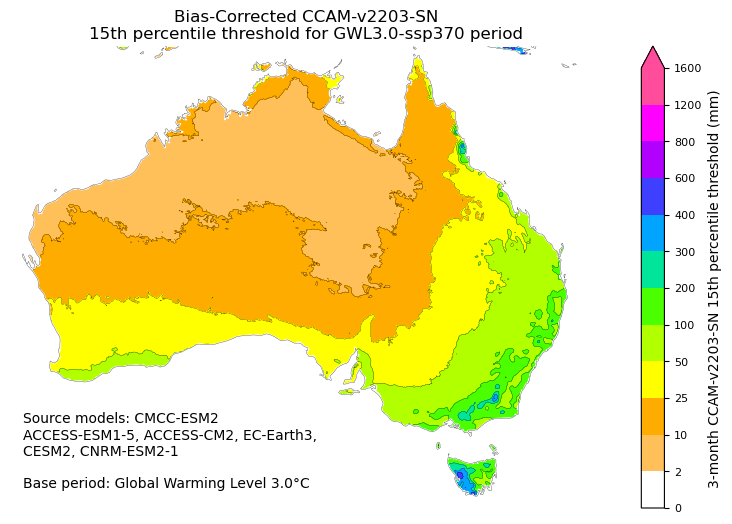

<Figure size 640x480 with 0 Axes>

In [5]:
for RCM in ['BARPA-R', 'CCAM-v2203-SN']:
    plot_write_percentile_threshold(RCM, 'recent', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=True)
    plot_write_percentile_threshold(RCM, 'GWL1.2-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=True)
    plot_write_percentile_threshold(RCM, 'GWL1.5-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=True)
    plot_write_percentile_threshold(RCM, 'GWL2.0-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=True)
    plot_write_percentile_threshold(RCM, 'GWL3.0-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=True)

In [5]:
rain['recent']['BARPA-R']['ACCESS-ESM1-5']

NameError: name 'rain' is not defined

In [54]:
rain['recent']['BARPA-R']['ACCESS-ESM1-5']

<xarray.DataArray 'prAdjust' (time: 360, lat: 691, lon: 886)> Size: 2GB
dask.array<getitem, shape=(360, 691, 886), dtype=float64, chunksize=(3, 691, 886), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon          (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * time         (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2020-12-01
    spatial_ref  int64 8B 0
Attributes:
    long_name:      Bias-Adjusted Precipitation
    standard_name:  lwe_precipitation_rate
    units:          mm d-1
    cell_methods:   time: mean (interval: 1 hour) time: mean (interval: 1D)
    regrid_method:  bilinear

### NCRA regions change in rainfall analysis

In [48]:
import rioxarray as rio
import geopandas
from shapely.geometry import mapping
import pandas as pd
import logging

# ignore garbage collection warnings and NaN slice warnings
logging.getLogger("distributed.utils_perf").setLevel(logging.ERROR)

for RCM in ['BARPA-R', 'CCAM-v2203-SN']:
    NCRA_dict={}
    print('Aggregating rain to NCRA regions (using %s outputs from %s):' % ('raw' if BC_SWITCH==False else 'bias-corrected', RCM))
    for NCRA_region in ['NSW_&_ACT', 'NT', 'QLD_North', 'QLD_South', 'SA', 'TAS', 'VIC', 'WA_North', 'WA_South']: 
        NCRA_dict[NCRA_region]={}
        print('---> %s' % (NCRA_region))
        for period in ['recent', 'GWL1.2-ssp370', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370']:
            NCRA_dict[NCRA_region][period]={}
            for model in rain['GWL1.5-ssp370'][RCM].keys():
                if period!='recent' and model=='AGCD':
                    continue
                if BC_SWITCH == False:
                    rain[period][RCM][model] = rain[period][RCM][model].compute() 
                #use rasterio, geopandas and shapely to aggregate rain to NCRA region
                rain[period][RCM][model].rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
                rain[period][RCM][model].rio.write_crs("EPSG:4283", inplace=True)
                geodf = geopandas.read_file("NCRA_shapefiles/%s.shp" % (NCRA_region),  crs="EPSG:4383")
                NCRA_dict[NCRA_region][period][model] = rain[period][RCM][model].rio.clip(geodf.geometry.apply(mapping), geodf.crs)
    
    # for comparison_period in ['recent', 'GWL1.2-ssp370']:
    #     plot_comparison_box_whisker(comparison_period, rain, RCM, NCRA_dict)
    #     plot_comparison_heatmap(comparison_period, rain, RCM, NCRA_dict)
    
    # del NCRA_dict
    break

Aggregating rain to NCRA regions (using bias-corrected outputs from BARPA-R):
---> NSW_&_ACT


2024-05-27 15:59:36,232 - distributed.worker.state_machine - ERROR - Unhandled exception in async instruction for <Task finished name='gather_dep(tcp://127.0.0.1:33671, {...})' coro=<Worker.gather_dep() done, defined at /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py", line 3638, in _finish_async_instruction
    stim = task.result()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py", line 3618, in wrapper
    return await func(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker.py", line 206, in wrapper
    return await method(self, *args, **kwargs)  # type: ignor

KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
2024-05-27 15:59:38,235 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2024-05-27 15:59:38,235 - distributed.nanny - ERROR - Worker process died unexpectedly
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/nanny.py", line 1019, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
Traceback (most recent call last):

In [40]:
NCRA_dict[NCRA_region][period][model]

<xarray.DataArray 'prAdjust' (time: 228, lat: 237, lon: 309)> Size: 134MB
dask.array<getitem, shape=(228, 237, 309), dtype=float64, chunksize=(3, 237, 309), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float64 2kB -35.1 -35.05 -35.0 ... -23.4 -23.35 -23.3
  * lon          (lon) float64 2kB 113.6 113.7 113.7 113.8 ... 128.9 128.9 129.0
  * time         (time) object 2kB 2082-01-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 8B 0
Attributes:
    long_name:      Bias-Adjusted Precipitation
    standard_name:  lwe_precipitation_rate
    units:          mm d-1
    cell_methods:   time: mean (interval: 1 hour) time: mean (interval: 1D)
    regrid_method:  bilinear

In [46]:
# Perform the clipping as you're already doing
clipped_data = rain[period][RCM][model].rio.clip(geodf.geometry.apply(mapping), geodf.crs)

# Convert the clipped data to a numpy array
clipped_array = clipped_data.values

# Apply a mask to remove NaN values
masked_array = np.ma.masked_invalid(clipped_array)

# Convert the masked array back to xarray DataArray
trimmed_array = xr.DataArray(masked_array, coords=clipped_data.coords, dims=clipped_data.dims)



In [47]:
trimmed_array

<xarray.DataArray (time: 228, lat: 237, lon: 309)> Size: 134MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat          (lat) float64 2kB -35.1 -35.05 -35.0 ... -23.4 -23.35 -23.3
  * lon          (lon) float64 2kB 113.6 113.7 113.7 113.8 ... 128.9 128.9 129.0
  * time         (time) object 2kB 2082-01-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 8B 0

In [22]:
rjsk = NCRA_dict[NCRA_region][comparison_GWL][model].compute()

start_time = time.time()
GWL_median =np.nanmedian(rjsk, axis=0)
recent_median = np.nanmedian(rjsk, axis=0)
pct_change = np.array(100*(GWL_median-recent_median)/recent_median).flatten()


end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

2.200910806655884


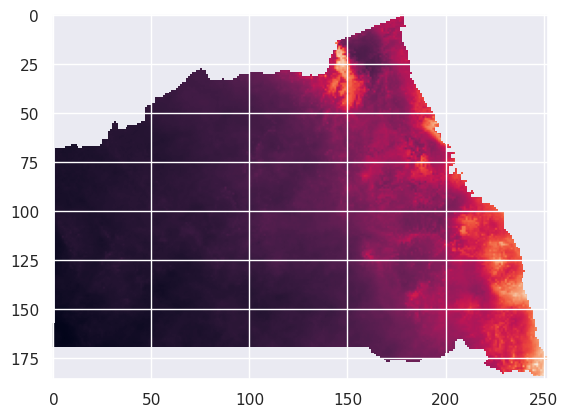

In [27]:
plt.imshow(recent_median)

In [ ]:
173.16101813316345

In [18]:
import dask.array as da

start_time = time.time()
warnings.filterwarnings("ignore", category=RuntimeWarning, message="All-NaN slice encountered")
# Convert NumPy arrays to Dask arrays
GWL_dask = da.from_array(NCRA_dict[NCRA_region][comparison_GWL][model], chunks='auto')
recent_dask = da.from_array(NCRA_dict[NCRA_region][comparison_contemporary][model], chunks='auto')

# Compute medians using Dask's aggregation functions
GWL_median = da.nanmedian(GWL_dask, axis=0)
recent_median = da.nanmedian(recent_dask, axis=0)

# Compute percentage change
pct_change = 100 * (GWL_median - recent_median) / recent_median

# Convert Dask array to NumPy array if needed
pct_change = pct_change.compute()

# Flatten the result
pct_change = pct_change.flatten()

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


196.32799458503723


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [28]:
comparison_contemporary = 'recent'
input_array = rain
RCM = 'BARPA-R'

from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import time

# Start the timer
start_time = time.time()

warnings.filterwarnings("ignore", category=RuntimeWarning, message="All-NaN slice encountered")
    
sns.set()
box_plot_data = []

for NCRA_region in ['NSW_&_ACT', 'NT', 'QLD_North', 'QLD_South', 'SA', 'TAS', 'VIC', 'WA_North', 'WA_South']:
    print(NCRA_region)
    for comparison_GWL in ['GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370']:
        print(comparison_GWL)
        gwl_list = []
        pct_change_list = []
        for model in input_array['GWL1.2-ssp370'][RCM].keys():
            print(model)
            model_array = NCRA_dict[NCRA_region][comparison_GWL][model].compute()
            GWL_median =np.nanmedian(model_array, axis=0)
            recent_median = np.nanmedian(model_array, axis=0)
            pct_change = np.array(100*(GWL_median-recent_median)/recent_median).flatten()
            pct_change_list.extend(pct_change)
            gwl_list.extend([comparison_GWL] * len(pct_change))
        box_plot_data.extend(zip(gwl_list, [NCRA_region.replace('_', ' ')]*len(pct_change_list), pct_change_list))
        
        break
    break
box_plot_df = pd.DataFrame(box_plot_data, columns=['GWL', 'Region', 'PctChange'])


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

NSW_&_ACT
GWL1.5-ssp370
CMCC-ESM2
ACCESS-ESM1-5
ACCESS-CM2
EC-Earth3
CESM2
MPI-ESM1-2-HR
NorESM2-MM


In [29]:
print(elapsed_time)

479.1063857078552


In [30]:
(479*27/60)/60

3.5925000000000002

In [11]:
(1315*27/60)/60

9.8625

In [13]:
list(input_array['GWL1.2-ssp370'][RCM].keys())

['CMCC-ESM2',
 'ACCESS-ESM1-5',
 'ACCESS-CM2',
 'EC-Earth3',
 'CESM2',
 'MPI-ESM1-2-HR',
 'NorESM2-MM']

### IFD analysis (Intensity, Frequency, Duration)
- very slow at the moment
- need to experiment when to call .compute()

In [7]:
def compute_ifd_metrics(input_binary_event_array):
    """
    Function to compute average drought duration, frequency and intensity.

    Parameters:
    - input_binary_event_array (3D xarray: binary where 1 = event (i.e. rainfall below p15 threshold) and 0 = no event)
    Returns:
    metric xarray with
    - duration (average drought duration at each gridcell)
    - frequency (average drought frequency at each gridcell)
    - intensity (average drought intensity at each gridcell)
    """
    segments_unmasked = np.ma.clump_unmasked(np.ma.masked_invalid(input_binary_event_array))
    events = [segment for segment in segments_unmasked if segment.stop - segment.start > 1]
    duration = np.ma.average([(event.stop - event.start) for event in events])
    frequency = len(events) / (input_binary_event_array.shape[0] / 12)
    intensity = np.ma.average([np.ma.average(input_binary_event_array[event.start:event.stop]) for event in events])

    metrics = np.array([intensity, frequency, duration])
    
    return metrics

In [ ]:
intensity = {}
frequency = {}
duration = {}

print('Processing CMIP6 drought duration, frequency, intensity metrics for period:')
for period in ['recent', 'current', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370']:
    print('---> %s' % (period))
    duration[period] = {}
    frequency[period] = {}
    intensity[period] = {}
    for model in ['CMCC-ESM2', 'ACCESS-ESM1-5', 'ACCESS-CM2', 'EC-Earth3', 'CESM2', 'MPI-ESM1-2-HR', 'NorESM2-MM']:
        print('     · %s' % (model))
        #apply dfi_metric function using xarray/dask capability
        dfi_metric = xr.apply_ufunc(
                    compute_ifd_metrics,
                    binary_cmip6_event_arrays[period][model].chunk({'time': 'auto'}),
                    input_core_dims=[['time']],
                    output_core_dims=[['metric']], 
                    vectorize=True,
                    dask='parallelized',
                    output_dtypes=[float],  
                    dask_gufunc_kwargs={'output_sizes': {'metric': 3}, 'allow_rechunk': True}
                    ) 
        
        int = dfi_metric.sel(metric=0)
        freq = dfi_metric.sel(metric=1)
        dur = dfi_metric.sel(metric=2)

        #call .compute() now so that IFD grids are called to memory
        intensity[period][model] = int.compute()
        frequency[period][model] = freq.compute()
        duration[period][model] = dur.compute()


Processing CMIP6 drought duration, frequency, intensity metrics for period:
---> recent
     · CMCC-ESM2


In [8]:
recent_duration = xr.concat(list(duration['recent'].values()), dim='models').mean(dim='models')
current_duration = xr.concat(list(duration['current'].values()), dim='models').mean(dim='models')
GWL15_duration = xr.concat(list(duration['GWL1.5-ssp370'].values()), dim='models').mean(dim='models')
GWL20_duration = xr.concat(list(duration['GWL2.0-ssp370'].values()), dim='models').mean(dim='models')
GWL30_duration = xr.concat(list(duration['GWL3.0-ssp370'].values()), dim='models').mean(dim='models')


In [ ]:
recent_duration.to_netcdf('duration_recent.nc')

### SPI analysis
- zero mean bug

In [9]:
# ### SPI
# spi_3 = calculate_spi(pr_recent_period['precip'], pr_base_period['precip'], int(accumulation_period), 'MLE')
# spi_3 = (spi_3.where(np.isfinite(spi_3), np.nan))
# (xr.where(spi_3 <= -1, 1, 0)).sum(dim='time').plot()
# (spi_3)[351].plot(cmap='RdBu')
# plt.imshow(spi_3.values[349][::-1]<=-1)
# plt.colorbar()